In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('/content/Language Detection.csv',encoding='latin-1') #Read the dataset file as data

In [3]:
data.head() #Read the headings in the dataset

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
#Consider only two needed headings
df = data[['Text','Language']]
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [7]:
df['Language'].value_counts() #Get to know the number of words of each language

,count
Language,
English,1385
French,1014
Spanish,819
Portugeese,739
Italian,698
Russian,692
Sweedish,676
Malayalam,594
Dutch,546


In [8]:
#Separate the dependent and independent variables
X = df['Text']
y = df['Language']

In [9]:
#Label encoding of the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
#Text reprocessing
data_list = []
for text in X:
  text = re.sub(r'[!@#$(),\n"%^*?\:;~0-9]',' ',text)
  text = re.sub(r'[\[\]]',"",text)
  text = text.lower()
  data_list.append(text)

In [13]:
#Text to Numerical form
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()

In [14]:
X.shape

(10337, 28097)

In [16]:
#Training the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [17]:
#Model prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

In [18]:
#Prediction
y_pred = model.predict(x_test)

In [19]:
#Model evaluation
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
ac = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

Accuracy is : 0.9850096711798839
Classification report is :               precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       1.00      0.94      0.97        83
           2       1.00      0.96      0.98       100
           3       0.95      1.00      0.97       289
           4       0.98      1.00      0.99       212
           5       1.00      0.98      0.99        93
           6       1.00      0.97      0.99        73
           7       0.93      0.93      0.93        14
           8       1.00      0.98      0.99       138
           9       1.00      1.00      1.00        74
          10       0.98      1.00      0.99       123
          11       0.99      1.00      0.99       155
          12       1.00      0.99      1.00       140
          13       0.98      0.99      0.98       157
          14       0.98      0.99      0.98       136
          15       0.99      0.96      0.97        91
          16       1.

<function matplotlib.pyplot.show(close=None, block=None)>

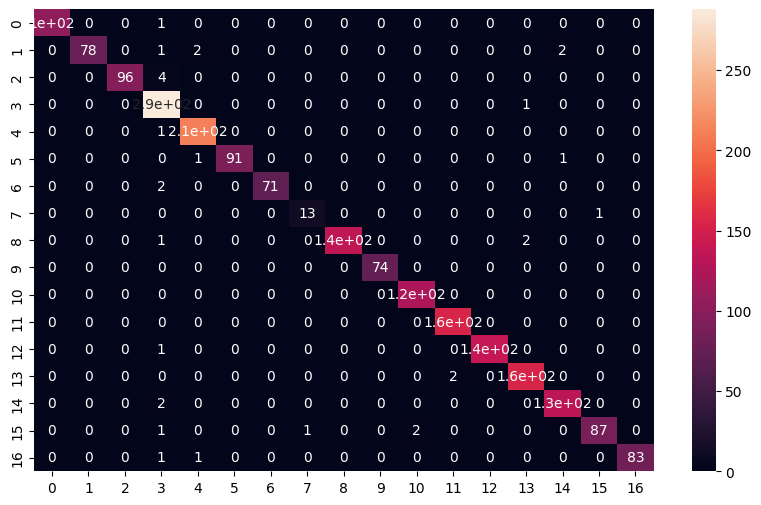

In [22]:
#Print the above metrics
print("Accuracy is :",ac)
print("Classification report is :",cr)
#Visualising the confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.show

In [23]:
#Testing the model
def predict(text):
  x = cv.transform([text]).toarray() #converting text to bag of words model (vector)
  lang = model.predict(x) #predicting the language
  lang = le.inverse_transform(lang) #finding the language corresponding the predicted value
  print("The langauge is in",lang[0]) #printing the language

In [25]:
#English
predict("Niti is a good girl")

The langauge is in English


In [26]:
#French
predict("Je suis beau")

The langauge is in French
